# SIR MODEL

In [1]:
# allows to import own functions
import sys
import os
path_name = os.getcwd()
root_project = os.path.split(path_name)[0]
sys.path.append(root_project)


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from src.models.sir_model import sir_model
sns.set()

In [2]:
OD = np.load('../data/interim/od_matrix.npy')
df = pd.read_pickle('../data/interim/country_info_final.gpickle')

In [3]:
df.loc[df['country_code'] == 'ESP']

,country_name,country_code,total_pop,arrivals,departures,latitude,longitude,arrivals/total,departures/total,arrivals/population,departures/population,continent_name,continent_code,departures/day
170,Spain,ESP,46723749.0,82773000.0,19116000.0,40.0,-4.0,0.056107,0.013164,1.77154,0.409128,Europe,EU,"{'CHE': 543, 'GMB': 29, 'MAR': 644, 'DEU': 203..."


In [4]:
OD = np.zeros(OD.shape)

In [5]:
R0_g = 2 
Tr_g = 10 
Tc_g = Tr_g / R0_g
# Tc_g = 3.54
# Tr_g = 8.75
omega_g = 0.01
initial_country = 'ESP'
T = 1000
initial_infected = 1
output_mode=1

initial_country, idx_country, R0, Tc, Tr, omega, total_infected,\
total_death, total_recovered, new_infected_t, new_infected_global_t,\
deaths_t, deaths_global_t, new_recovered_t, new_recovered_global_t,\
SIR_t, SIR_global_t, SIR_p_t, SIR_global_p_t \
= sir_model(df, OD, Tc_g, Tr_g, omega_g, initial_country, initial_infected, T, output_mode)

print("R0: {}".format(R0))
print("Total infected: {:,.0f}".format(total_infected))
print("Total death: {:,.0f}".format(total_death))
print("Total recovered: {:,.0f}".format(total_recovered))

R0: 2.0
Total infected: 35,860,495
Total death: 3,260,035
Total recovered: 32,600,451


# GLOBAL EDA

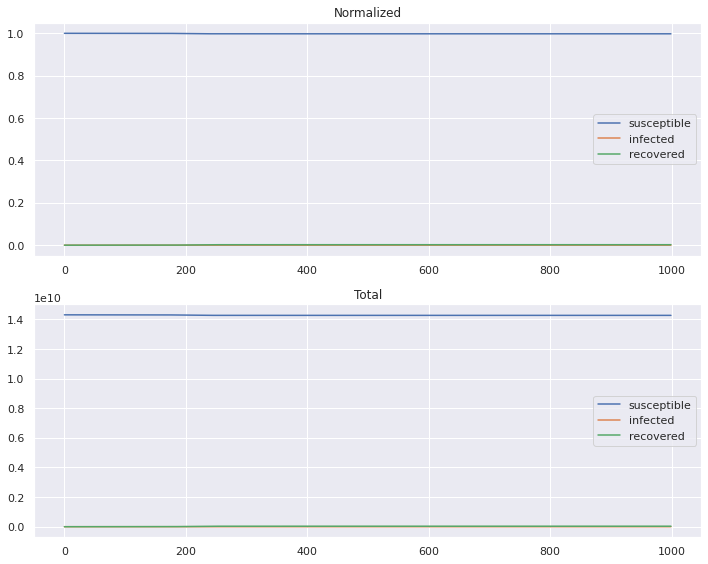

In [6]:
fig, ax = plt.subplots(2, 1, figsize = (10,8))
ax[0].plot(SIR_global_p_t[0,:], label = 'susceptible')
ax[0].plot(SIR_global_p_t[1,:], label = 'infected')
ax[0].plot(SIR_global_p_t[2,:], label = 'recovered')
ax[0].set_title('Normalized')
ax[0].legend()
ax[1].plot(SIR_global_t[0,:], label = 'susceptible')
ax[1].plot(SIR_global_t[1,:], label = 'infected')
ax[1].plot(SIR_global_t[2,:], label = 'recovered')
ax[1].set_title('Total')
ax[1].legend()
plt.tight_layout()

In [7]:
SIR_global_t[1,:][-10:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

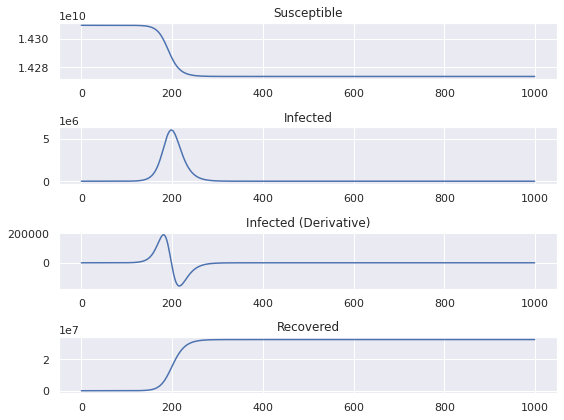

In [8]:
# los tres grupos en detalle en el instante t
fig, ax = plt.subplots(4, 1, figsize = (8,6))
ax[0].plot(SIR_global_t[0,:])
ax[0].set_title('Susceptible')
ax[1].plot(SIR_global_t[1,:])
ax[1].set_title('Infected')
ax[2].plot(np.gradient(SIR_global_t[1,:]))
ax[2].set_title('Infected (Derivative)')
ax[3].plot(SIR_global_t[2,:])
ax[3].set_title('Recovered')
plt.tight_layout()

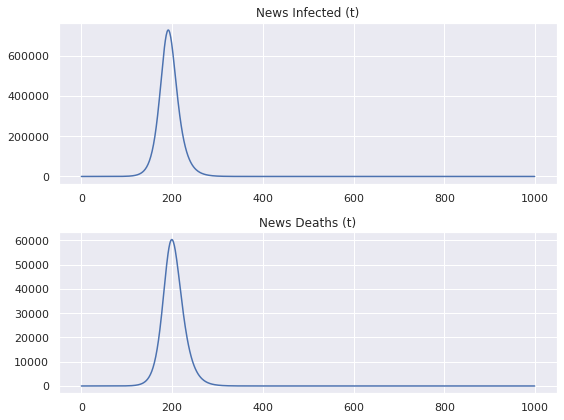

In [9]:
# nuevos infectados y muertos en el instante t
fig, ax = plt.subplots(2, 1, figsize = (8,6))
ax[0].plot(new_infected_global_t)
ax[0].set_title('News Infected (t)')
ax[1].plot(deaths_global_t)
ax[1].set_title('News Deaths (t)')
plt.tight_layout()

# BY COUNTRY

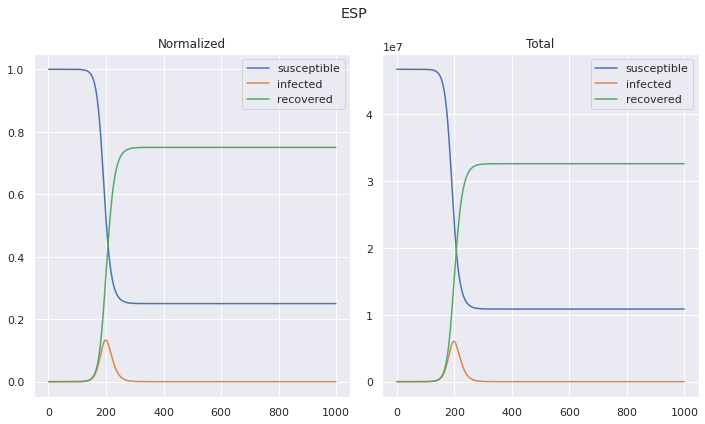

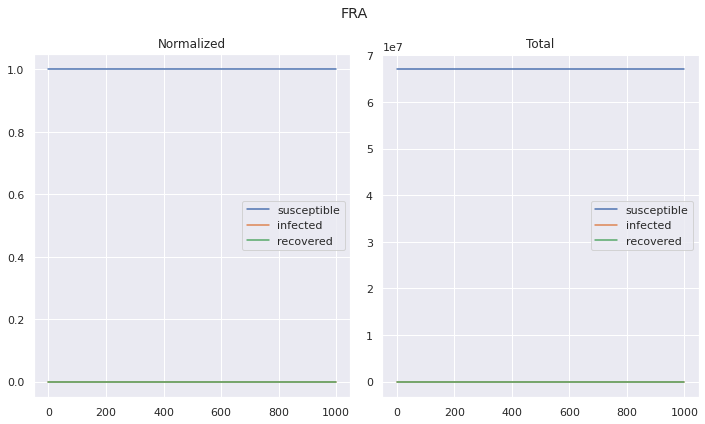

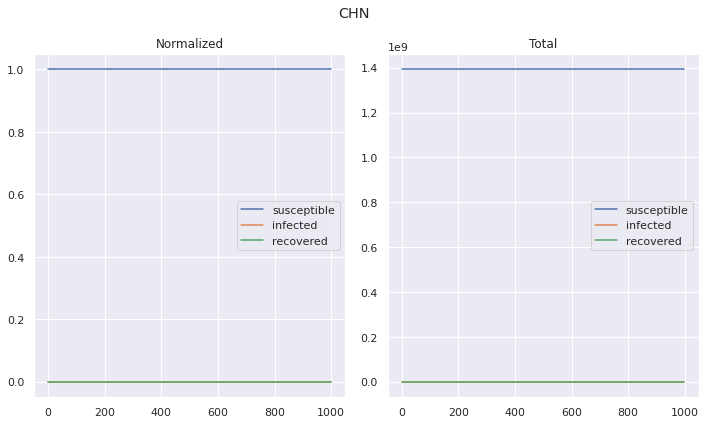

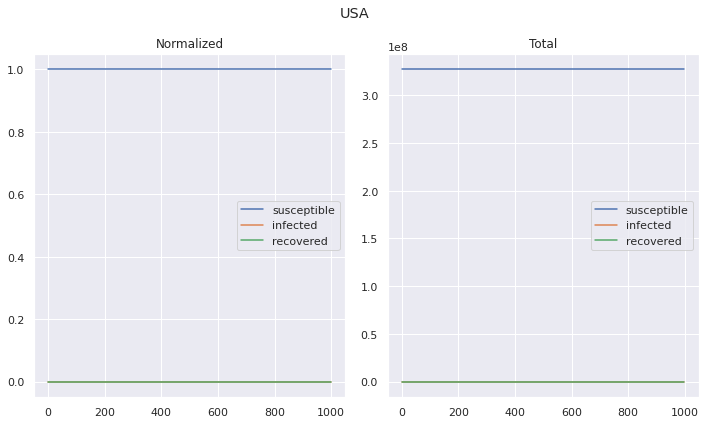

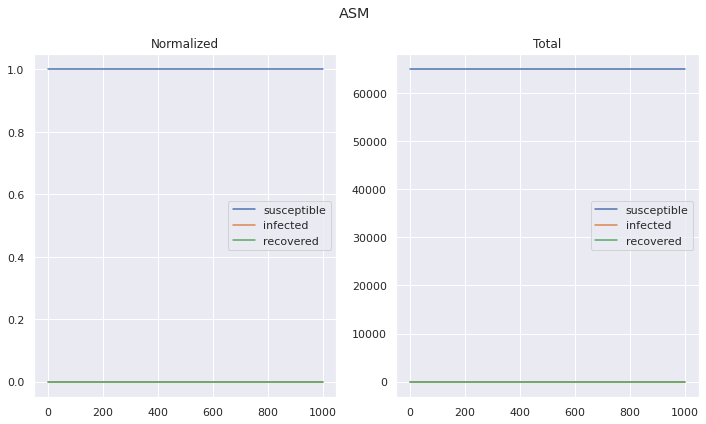

In [10]:
countries = [initial_country, 'FRA', 'CHN', 'USA', 'ASM']
idx = []

for country in countries:
    index = df.loc[df["country_code"] == country].index.item()
    idx.append(index)
    
#idx = [168, 39]  # introduce los indices de los paises a consultar

for i, country in zip(idx, countries):
    fig, ax = plt.subplots(1, 2, figsize = (10,6))
    ax[0].plot(SIR_p_t[i, 0, :], label='susceptible')
    ax[0].plot(SIR_p_t[i, 1, :], label='infected')
    ax[0].plot(SIR_p_t[i, 2, :], label='recovered')
    ax[0].set_title('Normalized')
    ax[0].legend()
    ax[1].plot(SIR_t[i, 0, :], label='susceptible')
    ax[1].plot(SIR_t[i, 1, :], label='infected')
    ax[1].plot(SIR_t[i, 2, :], label='recovered')
    ax[1].set_title('Total')
    ax[1].legend()
    fig.suptitle(country)
    plt.tight_layout()

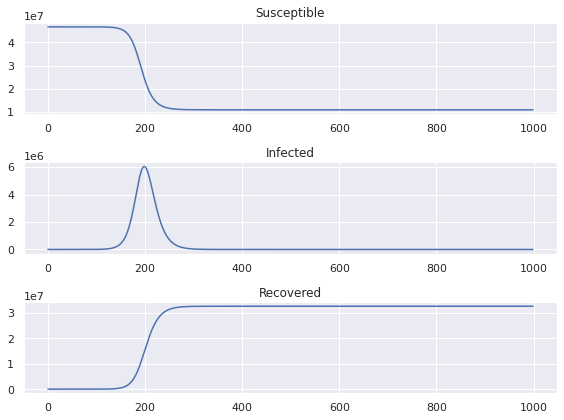

In [11]:
# los tres grupos en detalle en el instante t para el pais de inicio
fig, ax = plt.subplots(3, 1, figsize = (8,6))
ax[0].plot(SIR_t[idx_country,0,:])
ax[0].set_title('Susceptible')
ax[1].plot(SIR_t[idx_country,1,:])
ax[1].set_title('Infected')
ax[2].plot(SIR_t[idx_country,2,:])
ax[2].set_title('Recovered')
plt.tight_layout()

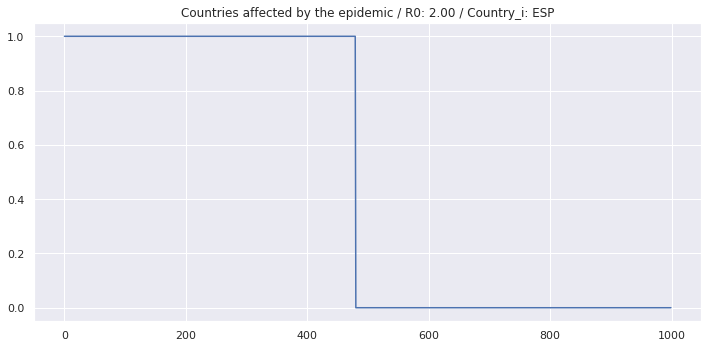

In [12]:
# para ver como evolucionan los paises afectados
affected = []
#for t in range(20,SIR_ncountry_t.shape[2]):
for t in range(T):
    idx = np.argwhere(SIR_t[:,1,t] > 0.99)
    countries = set(df.iloc[idx.flatten().tolist(), 0].values)
    #print('Day {} ->'.format(t), 'Cuntries affected: {}'.format(len(countries)))
    affected.append(len(countries))


fig, ax = plt.subplots(1, 1, figsize = (10,5))
plt.plot(affected)
plt.title('Countries affected by the epidemic / R0: {:.2f} / Country_i: {}'.format(R0, initial_country))
plt.tight_layout()

#plt.savefig('affectedcountries_{:.2}_{}.png'.format(R0_s, initial_country), dpi = 200)

In [13]:
# # creacion de plots en lote
# from tqdm import tqdm
# import itertools

# plt.ioff()

# R0_g = np.array([1.5, 1.9, 2, 2.5, 3, 4, 5]) # quiero explorar estos valores de R0
# T_r_g = 20 # fijo el valor de tiempo de recuperación
# gamma_g = T_r_g ** (-1)
# beta_g = R0_g * gamma_g # las beta que me dan los R0 que quiero
# omega_g = 0.01
# countries_g = ['ESP','FRA','CHN','ASM', 'STP' ]

# options = [countries_g, beta_g, [gamma_g], [omega_g]]

# for country, beta, gamma, omega in tqdm(itertools.product(*options)):
#     initial_country, idx_country, R0_s, omega_s, total_infected, total_death, infected_t, \
#     deaths_t, SIR_global_t, SIR_pworld_t_s, SIR_ncountry_t, SIR_pcountry_t \
#     = sir_model(df, OD, beta, gamma, omega, country, 1, 365)

#     # para ver como evolucionan los paises afectados
#     affected = []
#     #for t in range(20,SIR_ncountry_t.shape[2]):
#     for t in range(T):
#         idx = np.argwhere(SIR_ncountry_t[:,1,t] > 0.99)
#         countries = set(df.iloc[idx.flatten().tolist(), 0].values)
#         #print('Day {} ->'.format(t), 'Cuntries affected: {}'.format(len(countries)))
#         affected.append(len(countries))
    

#     fig, ax = plt.subplots(1, 1, figsize = (10,5))
#     plt.plot(affected)
#     plt.title('Countries affected by the epidemic / R0: {:.2f} / Country_i: {}'.format(R0_s, initial_country))
#     plt.tight_layout()

#     plt.savefig('affectedcountries_{:.2}_{}.png'.format(R0_s, initial_country), dpi = 200)
    
# plt.ion()